<a href="https://colab.research.google.com/github/armandoordonez/eda_couse/blob/main/Imputaci%C3%B3n_con_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imputación con Clustering

##1. Importamos librerias

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns


##2. Creamos el dataset

In [ ]:
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target

In [ ]:
data.shape

(150, 5)

In [ ]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,NaN,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


##3. Agregamos datos faltantes
Puesto que el Iris dataset no tiene valores NaN

In [ ]:
porcentaje_faltantes = 0.06

# Generar valores aleatorios para introducir datos faltantes
filas, columnas = data.shape
total_celdas = filas * columnas
num_faltantes = int(total_celdas * porcentaje_faltantes)

# Obtener índices aleatorios para introducir los valores faltantes
indices_faltantes = np.random.choice(total_celdas, num_faltantes, replace=False)

# Obtener las posiciones de filas y columnas correspondientes a los índices faltantes
filas_faltantes = indices_faltantes // columnas
columnas_faltantes = indices_faltantes % columnas

# Introducir los valores faltantes en el DataFrame
for fila, columna in zip(filas_faltantes, columnas_faltantes):
  if columna != 1 and columna != 4:
    data.iat[fila, columna] = np.nan


In [ ]:
data.isnull().sum()

sepal length (cm)     7
sepal width (cm)      0
petal length (cm)     6
petal width (cm)     11
target                0
dtype: int64

In [ ]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,NaN,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


##4. Identificamos y separamos valores faltantes

In [ ]:
data.isnull().sum()

sepal length (cm)     7
sepal width (cm)      0
petal length (cm)     6
petal width (cm)     11
target                0
dtype: int64

In [ ]:
# Separa las columnas con valores faltantes
columnas_con_faltantes = data.columns[data.isnull().any()].tolist()
data_faltante = data[columnas_con_faltantes]
data_no_faltante = data.drop(columns=columnas_con_faltantes)


In [ ]:
columnas_con_faltantes

['sepal length (cm)', 'petal length (cm)', 'petal width (cm)']

##5. Aplicamos clustering

In [ ]:
# Crea un modelo de K-Means
#kmeans = KMeans(n_clusters=k)  # Donde 'k' es el número de clusters deseado
kmeans = KMeans(n_clusters=4)
# Ajusta el modelo a los datos no faltantes
kmeans.fit(data_no_faltante)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [ ]:
clusters = kmeans.predict(data_no_faltante)
centroides = kmeans.cluster_centers_

## 6. Imputamos valores faltantes

In [ ]:
# Imputa los valores faltantes usando la media o la mediana del clúster correspondiente
imputer = SimpleImputer(strategy='mean')  # También puedes usar 'median'
data_imputada = pd.DataFrame(imputer.fit_transform(data_faltante))

# Restaura los nombres de las columnas en el conjunto de datos imputado
data_imputada.columns = data_faltante.columns

##7. Combinamos los datos

In [ ]:
data_final = pd.concat([data_no_faltante, data_imputada], axis=1)

In [ ]:
data_final.head()

,sepal width (cm),target,sepal length (cm),petal length (cm),petal width (cm)
0,3.5,0,5.1,1.4,0.200000
1,3.0,0,4.9,1.4,1.189928
2,3.2,0,4.7,1.3,0.200000
3,3.1,0,4.6,1.5,0.200000
4,3.6,0,5.0,1.4,0.200000


In [ ]:
data_final.tail()

,sepal width (cm),target,sepal length (cm),petal length (cm),petal width (cm)
145,3.0,2,6.7,5.200000,2.3
146,2.5,2,6.3,3.777778,1.9
147,3.0,2,6.5,5.200000,2.0
148,3.4,2,6.2,5.400000,2.3
149,3.0,2,5.9,5.100000,1.8


In [ ]:
data_final.isnull().sum()

sepal width (cm)     0
target               0
sepal length (cm)    0
petal length (cm)    0
petal width (cm)     0
dtype: int64

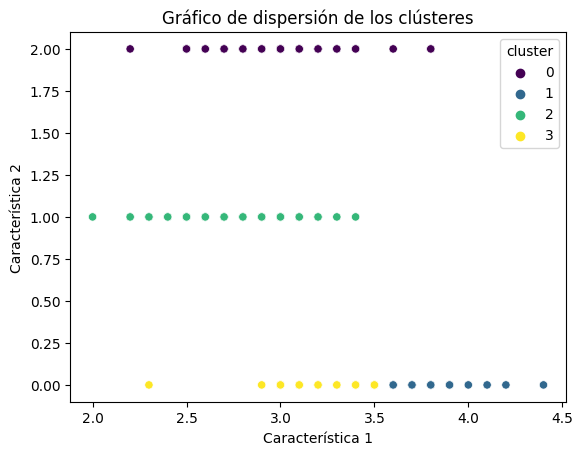

In [ ]:
# Cargar el dataset Iris con los clusters obtenidos
data_with_clusters = data_no_faltante.copy()
data_with_clusters['cluster'] = clusters

# Graficar el scatter plot en 2D
sns.scatterplot(x='sepal width (cm)', y='target', hue='cluster', data=data_with_clusters, palette='viridis')
plt.title('Gráfico de dispersión de los clústeres')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

# Conclusiones
Aunque inicialmente introdujimos unos cuantos valores NaN a través de Numpy, el hacer la imputación y aplicar el clustering, logró que aunque hicieramos cambios en el dataset, este se pudiera mantener acorde al resto de los datos, logrando así una cohesión y que los datoas imputados tuvieran sentido